In [100]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model

In [4]:
portfolio = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")
portfolio

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [8]:
market = pd.read_excel("Market_Portfolio.xlsx",index_col="Date")
market

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [11]:
a = portfolio-market.values
a

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [111]:
mean_array = pd.DataFrame(mean_array,index=a.columns)
mean_array.columns = ["Expected deviation from market return"]
mean_array

,Expected deviation from market return
NoDur,0.154750
Durbl,-0.014750
Manuf,0.264750
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.168250
Hlth,0.035750
Utils,0.159083
Other,-0.259000


In [17]:
mean = a.mean()
mean
mean_array = np.array(mean)
mean_array
tran_mean = mean_array.T
tran_mean

array([ 0.15475   , -0.01475   ,  0.26475   ,  0.48308333,  0.01816667,
        0.13333333,  0.16825   ,  0.03575   ,  0.15908333, -0.259     ])

In [13]:
cov = a.cov()
cov

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [14]:
cov_array = np.array(cov)
cov_array

array([[ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
         1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ],
       [-6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
        -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529],
       [-1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
        -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361],
       [-1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
        -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ],
       [-1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
        -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025],
       [ 1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
         4.68256695,  0.46379748,  0.69315714,  2.72147703, -1.27177815],
       [ 1.14074116, -0.35433527, -1.15459666, -3.7104391 , -0.24535029,
         0.46379748,  4.452628  ,  0.76451015

In [18]:
inverse_cov = np.linalg.inv(cov_array)
inverse_cov

array([[ 5.45383229e-01,  4.52282303e-02,  2.07945041e-01,
         2.78363758e-01,  6.04680938e-01,  1.53595518e-01,
         1.80487809e-01,  1.90500937e-01,  5.74650893e-02,
         7.59500969e-01],
       [ 4.52282303e-02,  8.96520899e-02, -8.74489380e-02,
         3.89464036e-02,  4.29778706e-02,  6.25343163e-03,
        -7.13876686e-04,  6.30519257e-02,  2.71023736e-02,
         3.45527748e-02],
       [ 2.07945041e-01, -8.74489380e-02,  1.13979978e+00,
         4.02051132e-01,  1.05645736e+00,  3.70594533e-01,
         5.77248304e-01,  6.14377150e-01,  3.04562775e-01,
         1.39790823e+00],
       [ 2.78363758e-01,  3.89464036e-02,  4.02051132e-01,
         5.06498392e-01,  9.53963540e-01,  3.57385466e-01,
         4.62025059e-01,  5.39514740e-01,  1.89783184e-01,
         1.27657562e+00],
       [ 6.04680938e-01,  4.29778706e-02,  1.05645736e+00,
         9.53963540e-01,  2.30237254e+00,  7.43644981e-01,
         9.52973363e-01,  1.15990395e+00,  5.37592942e-01,
         2.

In [20]:
zeta = tran_mean@inverse_cov@mean_array
zeta

0.20474497351130078

In [21]:
identity_matrix = np.ones(10)
identity_matrix

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
tran_identity = identity_matrix.T

In [23]:
alepha = tran_mean@inverse_cov@identity_matrix
alepha

2.932127882630633

In [24]:
delta = tran_identity@inverse_cov@identity_matrix
delta

58.55025437639917

In [25]:
Rmv = alepha/delta
Rmv

0.050078823975400776

In [26]:
def variance_computing(item):
    return 1/delta+[delta/(zeta*delta-alepha*alepha)]*(item-Rmv)*(item-Rmv)

In [27]:
rp = np.linspace(0,0.1,201)
rp

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235,
       0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275,
       0.028 , 0.0285, 0.029 , 0.0295, 0.03  , 0.0305, 0.031 , 0.0315,
       0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355,
       0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395,
       0.04  , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435,
       0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475,
       0.048 , 0.0485, 0.049 , 0.0495, 0.05  , 0.0505, 0.051 , 0.0515,
       0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555,
      

In [29]:
result = variance_computing(rp)
result

array([0.06038791, 0.05952741, 0.05867556, 0.05783234, 0.05699775,
       0.0561718 , 0.05535448, 0.05454579, 0.05374575, 0.05295433,
       0.05217155, 0.0513974 , 0.05063189, 0.04987502, 0.04912677,
       0.04838717, 0.04765619, 0.04693385, 0.04622015, 0.04551508,
       0.04481864, 0.04413084, 0.04345167, 0.04278114, 0.04211924,
       0.04146598, 0.04082135, 0.04018536, 0.039558  , 0.03893927,
       0.03832918, 0.03772772, 0.0371349 , 0.03655071, 0.03597516,
       0.03540824, 0.03484996, 0.03430031, 0.03375929, 0.03322691,
       0.03270316, 0.03218805, 0.03168157, 0.03118373, 0.03069452,
       0.03021395, 0.02974201, 0.0292787 , 0.02882403, 0.028378  ,
       0.0279406 , 0.02751183, 0.0270917 , 0.0266802 , 0.02627733,
       0.0258831 , 0.02549751, 0.02512055, 0.02475222, 0.02439253,
       0.02404147, 0.02369905, 0.02336526, 0.02304011, 0.02272359,
       0.02241571, 0.02211646, 0.02182584, 0.02154386, 0.02127051,
       0.0210058 , 0.02074972, 0.02050228, 0.02026347, 0.02003

In [30]:
sqrt_result = np.sqrt(result)
sqrt_result

array([0.24573951, 0.24398241, 0.24223038, 0.24048355, 0.23874201,
       0.2370059 , 0.23527533, 0.23355041, 0.23183129, 0.23011808,
       0.22841092, 0.22670996, 0.22501532, 0.22332715, 0.2216456 ,
       0.21997083, 0.21830298, 0.21664222, 0.21498872, 0.21334263,
       0.21170414, 0.21007342, 0.20845065, 0.20683602, 0.20522973,
       0.20363197, 0.20204294, 0.20046286, 0.19889192, 0.19733036,
       0.19577839, 0.19423626, 0.19270418, 0.19118241, 0.18967119,
       0.18817078, 0.18668143, 0.18520342, 0.18373702, 0.1822825 ,
       0.18084016, 0.17941029, 0.17799319, 0.17658916, 0.17519853,
       0.1738216 , 0.17245872, 0.17111021, 0.16977642, 0.1684577 ,
       0.16715441, 0.1658669 , 0.16459555, 0.16334074, 0.16210285,
       0.16088227, 0.15967939, 0.15849463, 0.15732839, 0.15618108,
       0.15505313, 0.15394496, 0.152857  , 0.15178969, 0.15074346,
       0.14971875, 0.14871602, 0.14773571, 0.14677826, 0.14584413,
       0.14493377, 0.14404763, 0.14318616, 0.14234981, 0.14153

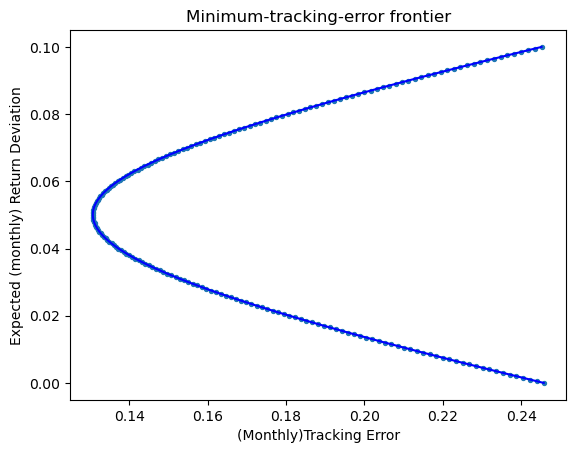

In [120]:
plt.scatter(sqrt_result,rp,s=8)
plt.plot(sqrt_result,rp,linestyle="-",color="blue")
plt.xlabel("(Monthly)Tracking Error")
plt.ylabel("Expected (monthly) Return Deviation")
plt.title('Minimum-tracking-error frontier')
plt.show()

In [35]:
rf = 0

In [36]:
def variance_computing1(item):
    return ((item - rf) * (item - rf)) / (zeta - 2 * alepha * rf + delta * rf * rf)

In [38]:
result1 = variance_computing1(rp)

In [39]:
sqrt_result1 = np.sqrt(result1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


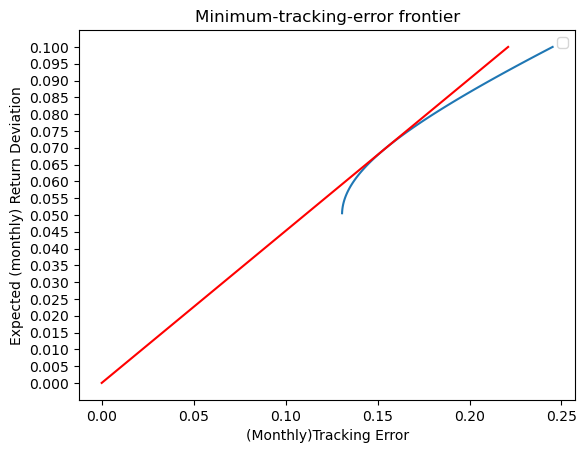

In [119]:
plt.plot(sqrt_result[rp>0.05],rp[rp>0.05])
plt.plot(sqrt_result1,rp,color="red")
plt.legend()
plt.xlabel("(Monthly)Tracking Error")
plt.ylabel("Expected (monthly) Return Deviation")
plt.title("Minimum-tracking-error frontier")
plt.yticks(np.arange(0,0.105,0.005))
plt.show()

In [45]:
std = a.std()
std_array = np.array(std)

In [105]:
information_ratio = linregress(sqrt_result1,rp)[0]
information_ratio

0.45248753961993377

In [47]:
b = zeta-2*alepha*rf+delta*rf*rf
sharp_ratio = np.sqrt(b)
sharp_ratio

0.4524875396199334

In [53]:
rtg = (alepha*rf-zeta)/(delta*rf-alepha)
rtg

0.06982811859065595

In [51]:
weight = (delta*rtg-alepha)/(zeta*delta-alepha**2)*inverse_cov@mean_array+(zeta-alepha*rtg)/(zeta*delta-alepha**2)
*inverse_cov@identity_matrix

In [61]:
np.set_printoptions(suppress=True)

In [62]:
weight

array([0.05263419, 0.00015343, 0.13762671, 0.08703224, 0.17935289,
       0.07107397, 0.10688447, 0.10277595, 0.04016221, 0.22230394])

In [65]:
portfolio.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

In [74]:
information_ratio = pd.DataFrame(information_ratio,index=portfolio.columns)
information_ratio.columns = ["Information Ratio"]
information_ratio

,Information Ratio
NoDur,0.066350
Durbl,-0.002858
Manuf,0.154130
Enrgy,0.110034
HiTec,0.008045
Telcm,0.061616
Shops,0.079735
Hlth,0.012784
Utils,0.045420
Other,-0.122050


In [82]:
weight = pd.DataFrame(weight,index=portfolio.columns)
weight.columns = ["Weight"]
weight

,Weight
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


In [84]:
R = portfolio.mean()
V = portfolio.cov()

In [87]:
df = pd.DataFrame(columns=['mean', 'std_dev'],index=range(100000))
df

,mean,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [88]:
i = 0
for i in range(100000):
    w = np.random.uniform(0,1,10)
    weight = w/w.sum()
    mean = weight@R
    variance = weight.T@V@weight
    std = np.sqrt(variance)
    df.iloc[i]=[mean,std]
    i +=1

In [89]:
df

,mean,std_dev
0,0.83651,4.647248
1,0.863407,4.438094
2,0.839684,4.405279
3,0.821917,4.505118
4,0.888967,4.597201
...,...,...
99995,0.821194,4.285456
99996,0.835056,4.427498
99997,0.817492,4.545744
99998,0.856945,4.473665


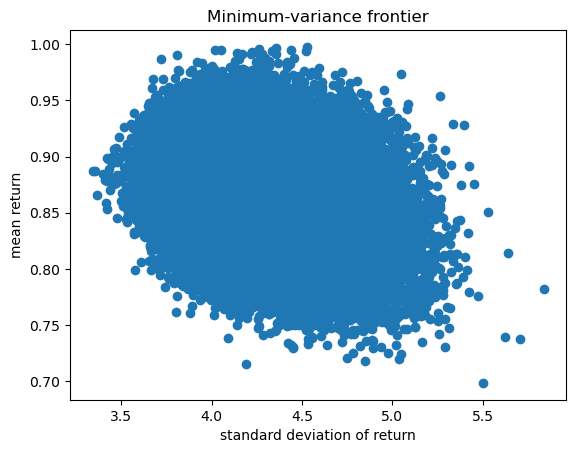

In [90]:
plt.scatter(df['std_dev'], df['mean'])
plt.xlabel('standard deviation of return')
plt.ylabel('mean return')
plt.title('Minimum-variance frontier')
plt.show()

In [91]:
df_2 = pd.DataFrame(columns=['mean', 'std_dev'],index=range(100000))
df_2

,mean,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [93]:
i = 0
for i in range(100000):
    inverse_w = np.random.uniform(0,1,10)
    w = 1/inverse_w
    weight = w/w.sum()
    mean = weight @ R
    variance = weight.T @ V @ weight
    std_dev = np.sqrt(variance)
    df_2.iloc[i]=[mean,std_dev]
    i +=1

In [94]:
df_2

,mean,std_dev
0,1.201501,5.799654
1,0.871569,4.249907
2,0.813338,4.323019
3,0.743006,4.854808
4,0.733011,8.196149
...,...,...
99995,0.851838,4.279513
99996,0.779474,3.75758
99997,0.937132,3.938221
99998,0.889491,4.002769


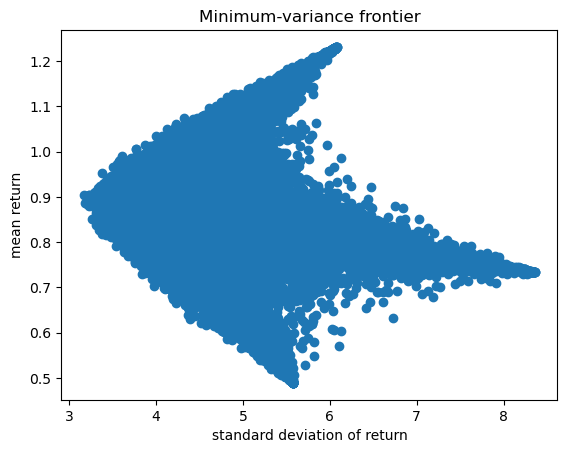

In [95]:
plt.scatter(df_2['std_dev'], df_2['mean'])
plt.xlabel('standard deviation of return')
plt.ylabel('mean return')
plt.title('Minimum-variance frontier')
plt.show()